<a href="https://colab.research.google.com/github/MochamadPhilliaWibowo/Machine-Learning-Class/blob/main/Tugas%20Week%202/Google%20Colab/Tugas_Lecture_2_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mochamad Phillia Wibowo

1103204191

TK-44-G04

Tugas 2 Regression ML Model

Model Linear Regression, Dataset Salary_Data_Simple_SVR.csv

Referensi Kaggle : https://www.kaggle.com/code/rahmadadeakbar/sklearn-svr-salary-data

In [ ]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'salary-data-simple-linear-regression:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F10624%2F14867%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240306%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240306T135813Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6d7f16e760550b8731eb65e4a818736d5db9d6cbd87b37213bbff2cda9053852482d27f319166030e7bde91cc8c5c1e3f1b62e9e693a74495a99d9a52c40e70808887347b9f7f0726dfa6a1e985a583780501eaa8b69729558388e0787fbf1b2c38a14f6cbfcb71dca56c57fd2e14727972141399315dbe5887e70d002605edc86a12f39420625e56feddde36bf1e7f7f8705688c0aaf3644d5eef2f43b876017c765ad66bbfb0013d1252ce7a633cd20f87507b10b785f2fb7dc87ba2b1d6a304c0bdc64903e6b2c9d55d0cd39629ba45f3288b9f657a14cba5a398de514fb7fab0214ec7eb0e8896b119c158a0129d01f2abc047ff9668df3f37341ed8d5d6'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 378 bytes downloaded
Downloaded and uncompressed: salary-data-simple-linear-regression
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/salary-data-simple-linear-regression/Salary_Data.csv


In [ ]:
# Tujuan
# Setelah mengenal support vector regression, kita akan belajar menerapkan teknik tersebut ke dalam model ML dengan library SKLearn.



# Tahapan Latihan
# Tahapan pada latihan kali ini adalah sebagai berikut:

# Ubah data menjadi Dataframe.
# Pisahkan atribut dan label.
# Latih model SVR.
# Buat plot dari model.

import pandas as pd

# membaca dataset dan mengubahnya menjadi dataframe
data = pd.read_csv('/kaggle/input/salary-data-simple-linear-regression/Salary_Data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
# memisahkan atribut dan label
X = data['YearsExperience']
y = data['Salary']

# mengubah bentuk atribut
X = X[:,np.newaxis]

<ipython-input-6-132cabc8556b>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:,np.newaxis]


In [ ]:
# Pemisahan Fitur dan Target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

# Pembagian data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

# Inisialisasi model
model = LinearRegression()

# Pelatihan model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluasi model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [ ]:
# Menampilkan hasil evaluasi
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Mean Absolute Percentage Error:", mape)

Mean Squared Error: 49830096.85590839
Mean Absolute Error: 6286.453830757749
Root Mean Squared Error: 7059.04362190151
R-squared: 0.9024461774180497
Mean Absolute Percentage Error: 7.744880046205216


In [ ]:
# Prediksi
new_data = [[5.5]]  # Contoh data baru
prediction = model.predict(new_data)
print("Prediction for new data:", prediction)

Prediction for new data: [77152.56728845]


In [ ]:
# Buat dataframe untuk menampung nilai aktual, prediksi, dan YearsExperience
df_results = pd.DataFrame({'YearsExperience': X_test[:,0], 'Actual': y_test, 'Predicted': y_pred})

# Cetak dataframe hasil
print(df_results)

   YearsExperience    Actual      Predicted
0              9.6  112635.0  115790.210113
1              4.9   67938.0   71498.278095
2              8.2  113812.0  102596.868661
3              5.3   83088.0   75267.804224
4              3.2   64445.0   55477.792045
5              3.7   57189.0   60189.699707


In [ ]:
new_data = np.array([[10]]) #contoh pengalaman 10 tahun

# Menggunakan model untuk membuat prediksi dari data baru
prediction = model.predict(new_data)

# Mencetak prediksi
print("Prediction for new data:", prediction)

Prediction for new data: [119559.73624209]


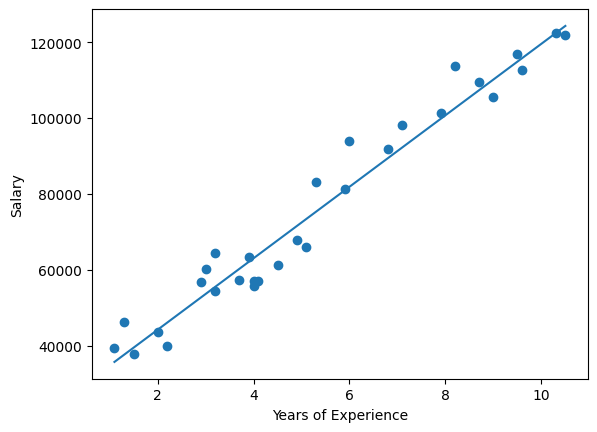

In [ ]:
import matplotlib.pyplot as plt

# memvisualisasikan model
plt.scatter(X, y)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.plot(X, model.predict(X))

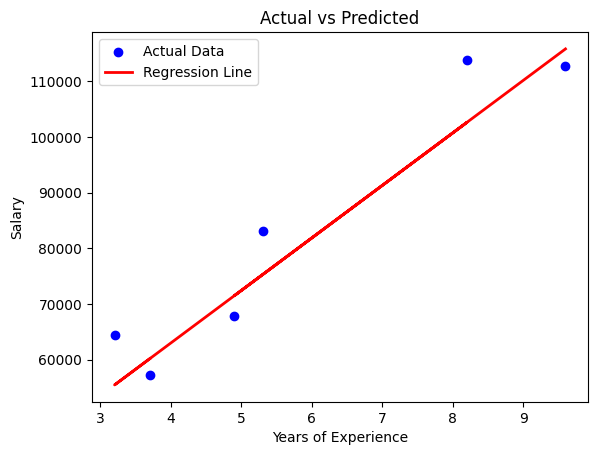

In [ ]:
# Visualisasi data aktual dan prediksi
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Actual vs Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

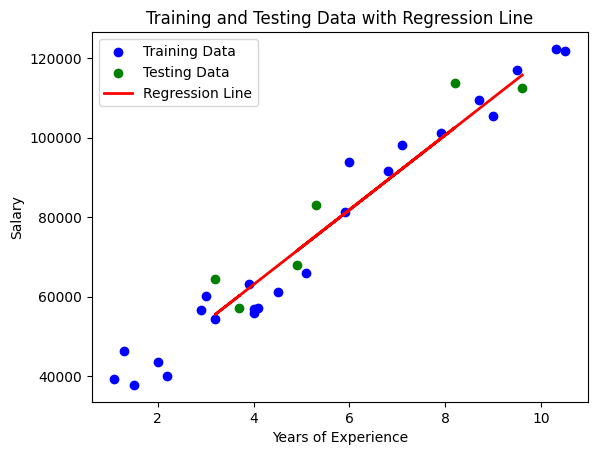

In [ ]:
# Visualisasi data train, data test, dan garis regresi
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Training and Testing Data with Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()